In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
#from statsmodels.tsa.seasonal import seasonal_decompose

#adjust figure size
# from pylab import rcParams
# rcParams['figure.figsize'] = 10, 5

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)
%matplotlib inline

In [2]:
train_o = pd.read_csv('./house-prices-advanced-regression-techniques/train.csv')

test_o = pd.read_csv('./house-prices-advanced-regression-techniques/test.csv')

In [3]:
train = train_o.copy()

test = test_o.copy()

In [4]:
train.shape

(1460, 81)

In [5]:
test.shape #price column missing and 1 record missing

(1459, 80)

In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [8]:
subset = train.iloc[:, 0:27]
subset['SalePrice'] = train.SalePrice
subset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,118000


In [9]:
subset.dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotFrontage     float64
LotArea           int64
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
MasVnrArea      float64
SalePrice         int64
dtype: object

In [10]:
np.sum(subset.isnull())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
SalePrice          0
dtype: int64

In [11]:
subset[subset.select_dtypes(["object"]).columns] = subset.select_dtypes(["object"]).apply(lambda x: x.astype("category"))


In [12]:
subset.dtypes

Id                 int64
MSSubClass         int64
MSZoning        category
LotFrontage      float64
LotArea            int64
Street          category
Alley           category
LotShape        category
LandContour     category
Utilities       category
LotConfig       category
LandSlope       category
Neighborhood    category
Condition1      category
Condition2      category
BldgType        category
HouseStyle      category
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle       category
RoofMatl        category
Exterior1st     category
Exterior2nd     category
MasVnrType      category
MasVnrArea       float64
SalePrice          int64
dtype: object

## Mising Values

**Alley**

Convert alley NAs to "None" to mean "no alley access"

In [19]:
subset.Alley = subset.Alley.cat.add_categories(["None"])

In [20]:
subset.Alley = subset.Alley.fillna('None')

In [22]:
sum(subset.Alley.isnull())

0

**LotFrontage**

These appear to be MCAR, meaning, the missingness is independent of the other data set observations.

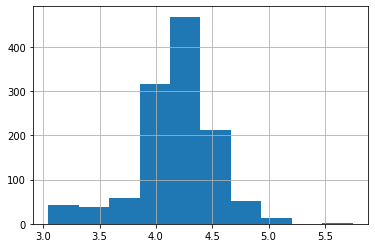

In [23]:
# subset.LotFrontage.hist() # Right skewed

np.log(subset.LotFrontage).hist() # better distribution

In [24]:
subset[["LotFrontage"]].isnull().sum()

LotFrontage    259
dtype: int64

In [25]:
print(subset.LotFrontage.median())

print(subset.LotFrontage.mean())

69.0
70.04995836802665


In [26]:
subset[["LotFrontage", "Neighborhood"]].groupby("Neighborhood")['LotFrontage'].value_counts()

Neighborhood  LotFrontage
Blmngtn       43.0            8
              53.0            5
              51.0            1
Blueste       24.0            2
BrDale        21.0           13
              24.0            3
BrkSide       50.0           15
              60.0           10
              51.0            9
              52.0            6
              55.0            3
              56.0            1
              58.0            1
              64.0            1
              65.0            1
              70.0            1
              92.0            1
              98.0            1
              144.0           1
ClearCr       80.0            3
              62.0            1
              65.0            1
              73.0            1
              75.0            1
              79.0            1
              81.0            1
              83.0            1
              92.0            1
              97.0            1
              138.0           1
CollgCr       

In [27]:
subset['LotFrontage'].isnull().groupby(subset['Neighborhood']).sum()


Neighborhood
Blmngtn     3.0
Blueste     0.0
BrDale      0.0
BrkSide     7.0
ClearCr    15.0
CollgCr    24.0
Crawfor    10.0
Edwards     8.0
Gilbert    30.0
IDOTRR      3.0
MeadowV     2.0
Mitchel    13.0
NAmes      39.0
NPkVill     2.0
NWAmes     28.0
NoRidge     8.0
NridgHt     1.0
OldTown     4.0
SWISU       2.0
Sawyer     26.0
SawyerW     9.0
Somerst     8.0
StoneBr     5.0
Timber      8.0
Veenker     4.0
Name: LotFrontage, dtype: float64

In [28]:
hood_lf_med = subset[["LotFrontage", "Neighborhood"]].groupby("Neighborhood")["LotFrontage"].median()

hood_lf_mean = subset[["LotFrontage", "Neighborhood"]].groupby("Neighborhood")["LotFrontage"].mean()

It looks like median imputation by neighborhood would be more conservative than the mean imputation. 

In [29]:
lf_calc = pd.merge(hood_lf_med,
        hood_lf_mean,
        on = "Neighborhood")

lf_calc["Greater"] = lf_calc.LotFrontage_x > lf_calc.LotFrontage_y

# print(len(lf_calc.LotFrontage_x)) # 25 observations
# print(np.mean(lf_calc.Greater)) # about 28 % true or 7 values where mean was less than median

lf_calc

,LotFrontage_x,LotFrontage_y,Greater
Neighborhood,,,
Blmngtn,43.0,47.142857,False
Blueste,24.0,24.000000,False
BrDale,21.0,21.562500,False
BrkSide,52.0,57.509804,False
ClearCr,80.0,83.461538,False
CollgCr,70.0,71.682540,False
Crawfor,74.0,71.804878,True
Edwards,65.5,68.217391,False
Gilbert,65.0,79.877551,False


In [30]:
subset_2 = subset.copy()

In [31]:
subset.LotFrontage

0        65.0
1        80.0
2        68.0
3        60.0
4        84.0
5        85.0
6        75.0
7         NaN
8        51.0
9        50.0
10       70.0
11       85.0
12        NaN
13       91.0
14        NaN
15       51.0
16        NaN
17       72.0
18       66.0
19       70.0
20      101.0
21       57.0
22       75.0
23       44.0
24        NaN
25      110.0
26       60.0
27       98.0
28       47.0
29       60.0
30       50.0
31        NaN
32       85.0
33       70.0
34       60.0
35      108.0
36      112.0
37       74.0
38       68.0
39       65.0
40       84.0
41      115.0
42        NaN
43        NaN
44       70.0
45       61.0
46       48.0
47       84.0
48       33.0
49       66.0
50        NaN
51       52.0
52      110.0
53       68.0
54       60.0
55      100.0
56       24.0
57       89.0
58       66.0
59       60.0
60       63.0
61       60.0
62       44.0
63       50.0
64        NaN
65       76.0
66        NaN
67       72.0
68       47.0
69       81.0
70       95.0
71    

In [32]:
pd.merge(subset[["Neighborhood","LotFrontage"]], subset_2.LotFrontage, left_index = True, right_index = True)

,Neighborhood,LotFrontage_x,LotFrontage_y
0,CollgCr,65.0,65.0
1,Veenker,80.0,80.0
2,CollgCr,68.0,68.0
3,Crawfor,60.0,60.0
4,NoRidge,84.0,84.0
5,Mitchel,85.0,85.0
6,Somerst,75.0,75.0
7,NWAmes,NaN,NaN
8,OldTown,51.0,51.0
9,BrkSide,50.0,50.0


In [33]:
subset_2['LotFrontage'] = subset_2.groupby(["Neighborhood"])['LotFrontage'].apply(lambda x: x.fillna(x.median()))
                   
subset_2.LotFrontage

0        65.0
1        80.0
2        68.0
3        60.0
4        84.0
5        85.0
6        75.0
7        80.0
8        51.0
9        50.0
10       70.0
11       85.0
12       71.0
13       91.0
14       73.0
15       51.0
16       73.0
17       72.0
18       66.0
19       70.0
20      101.0
21       57.0
22       75.0
23       44.0
24       71.0
25      110.0
26       60.0
27       98.0
28       47.0
29       60.0
30       50.0
31       71.0
32       85.0
33       70.0
34       60.0
35      108.0
36      112.0
37       74.0
38       68.0
39       65.0
40       84.0
41      115.0
42       66.5
43       70.0
44       70.0
45       61.0
46       48.0
47       84.0
48       33.0
49       66.0
50       65.0
51       52.0
52      110.0
53       68.0
54       60.0
55      100.0
56       24.0
57       89.0
58       66.0
59       60.0
60       63.0
61       60.0
62       44.0
63       50.0
64       70.0
65       76.0
66       73.0
67       72.0
68       47.0
69       81.0
70       95.0
71    

In [34]:
subset_2['LotFrontage'] = subset[["Neighborhood", "LotFrontage"]].groupby("Neighborhood")['LotFrontage'].transform("median")


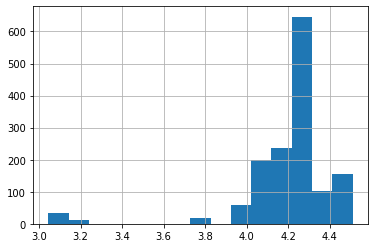

In [35]:
#subset_2.LotFrontage.hist() # Right skewed

np.log(subset_2.LotFrontage).hist(bins = 15) # better distribution

In [36]:
train_corr = train.corr(method='pearson')
train_corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

In [37]:
train_corr[(train_corr > 0.5) | (train_corr < -0.5)]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSSubClass,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotArea,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallQual,NaN,NaN,NaN,NaN,1.000000,NaN,0.572323,0.550684,NaN,NaN,NaN,NaN,0.537808,NaN,NaN,NaN,0.593007,NaN,NaN,0.550600,NaN,NaN,NaN,NaN,NaN,0.547766,0.600671,0.562022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.790982
OverallCond,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearBuilt,NaN,NaN,NaN,NaN,0.572323,NaN,1.000000,0.592855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.825667,0.537850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.522897
YearRemodAdd,NaN,NaN,NaN,NaN,0.550684,NaN,0.592855,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.642277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.507101
MasVnrArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinSF1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.522396,NaN,NaN,NaN,NaN,0.649212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
subset_corr = subset_2.corr(method='pearson')
subset_corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,SalePrice
Id,1.000000,0.011156,0.002847,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.021917
MSSubClass,0.011156,1.000000,-0.361564,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.084284
LotFrontage,0.002847,-0.361564,1.000000,0.250224,0.347734,-0.081143,0.315257,0.219735,0.298545,0.454679
LotArea,-0.033226,-0.139781,0.250224,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.263843
OverallQual,-0.028365,0.032628,0.347734,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.790982
OverallCond,0.012609,-0.059316,-0.081143,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.077856
YearBuilt,-0.012713,0.027850,0.315257,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.522897
YearRemodAdd,-0.021998,0.040581,0.219735,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.507101
MasVnrArea,-0.050298,0.022936,0.298545,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.477493
SalePrice,-0.021917,-0.084284,0.454679,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,1.000000


(array([0.5]), <a list of 1 Text yticklabel objects>)

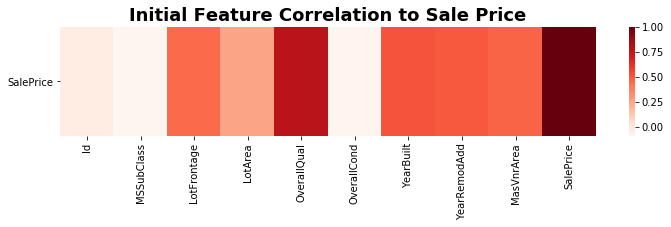

In [39]:
f,ax=plt.subplots(figsize=(12,2))
sns.heatmap(subset_corr.sort_values(by=['SalePrice'], ascending=False).head(1), cmap='Reds')
plt.title("Initial Feature Correlation to Sale Price", weight='bold', fontsize=18)
plt.yticks(rotation=0)

In [40]:
subset_corr[(subset_corr > 0.5) | (subset_corr < -0.5)]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,SalePrice
Id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSSubClass,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotArea,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
OverallQual,NaN,NaN,NaN,NaN,1.000000,NaN,0.572323,0.550684,NaN,0.790982
OverallCond,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
YearBuilt,NaN,NaN,NaN,NaN,0.572323,NaN,1.000000,0.592855,NaN,0.522897
YearRemodAdd,NaN,NaN,NaN,NaN,0.550684,NaN,0.592855,1.000000,NaN,0.507101
MasVnrArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
SalePrice,NaN,NaN,NaN,NaN,0.790982,NaN,0.522897,0.507101,NaN,1.000000


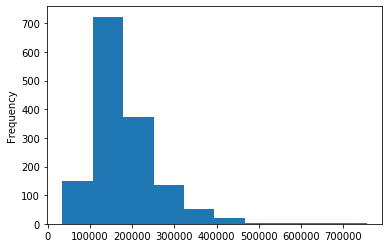

In [41]:
train.SalePrice.plot.hist() # Right skewed

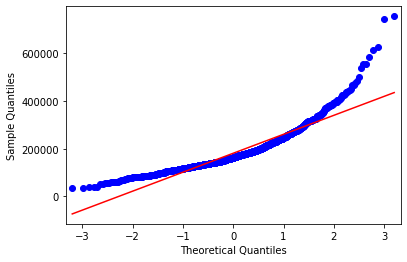

In [42]:
sm.qqplot(train.SalePrice, line='s') 
plt.show()

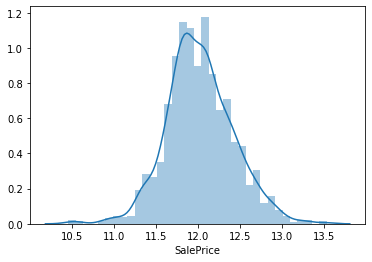

In [43]:
log_price = train.SalePrice.transform(np.log)

sns.distplot(log_price)

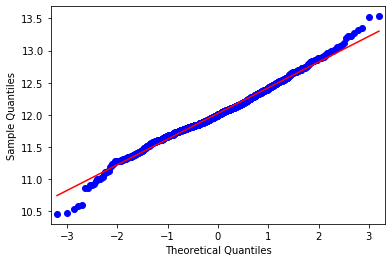

In [44]:
sm.qqplot(log_price, line='s') 
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a27d05d90>,
      dtype=object)

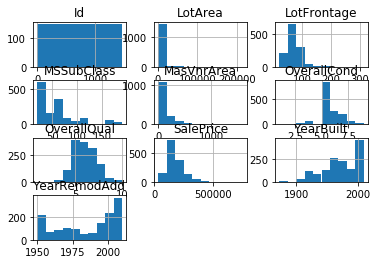

In [45]:
subset.hist()

**MSSubClass**

- 20 - 	1-STORY 1946 & NEWER ALL STYLES
- 30 - 	1-STORY 1945 & OLDER
- 40 - 	1-STORY W/FINISHED ATTIC ALL AGES
- 45 - 	1-1/2 STORY - UNFINISHED ALL AGES
- 50 - 	1-1/2 STORY FINISHED ALL AGES
- 60 - 	2-STORY 1946 & NEWER
- 70 - 	2-STORY 1945 & OLDER
- 75 - 	2-1/2 STORY ALL AGES
- 80 - 	SPLIT OR MULTI-LEVEL
- 85 - 	SPLIT FOYER
- 90 - 	DUPLEX - ALL STYLES AND AGES
- 120 - 1-STORY PUD (Planned Unit Development) - 1946 & NEWER
- 150 - 1-1/2 STORY PUD - ALL AGES
- 160 - 2-STORY PUD - 1946 & NEWER
- 180 - PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
- 190 - 2 FAMILY CONVERSION - ALL STYLES AND AGES

In [46]:
subset.MSSubClass.value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

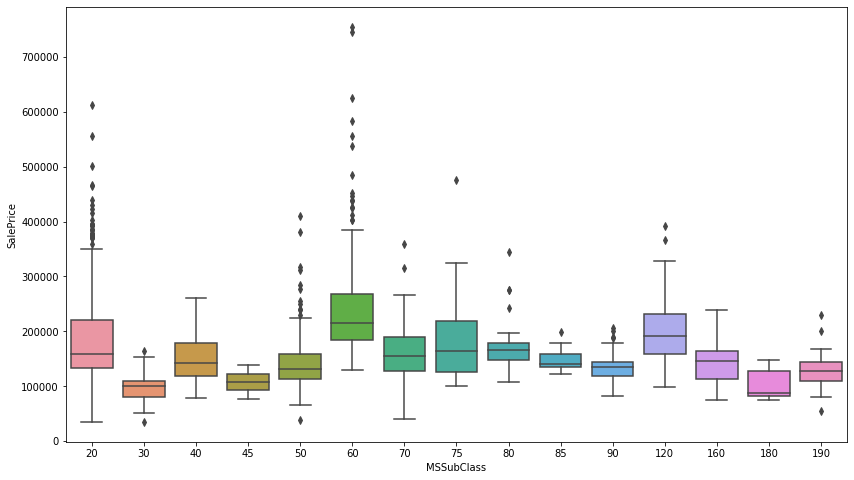

In [47]:
plt.figure(figsize=(14,8))
sns.boxplot(x = "MSSubClass", y = "SalePrice", data = subset )

**MSZoning**

Potentially dummify / bucket:
- A  Agriculture
- C  Commercial
- FV Floating Village Residential
- I  Industrial
- RH Residential High Density
- RL Residential Low Density
- RP Residential Low Density Park 
- RM Residential Medium Density

In [48]:
subset.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

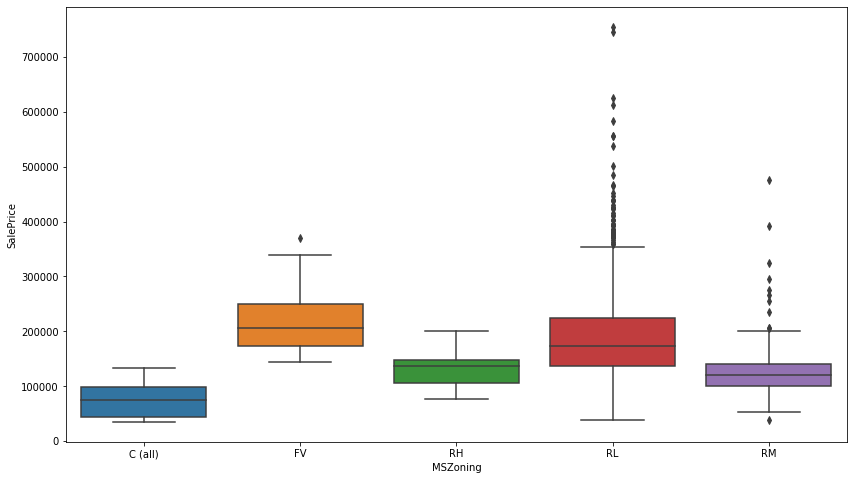

In [49]:
plt.figure(figsize=(14,8))
sns.boxplot(x = "MSZoning", y = "SalePrice", data = subset )

**Lot Frontage**

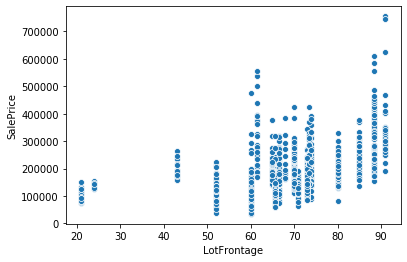

In [50]:
sns.scatterplot("LotFrontage", "SalePrice", data = subset_2)

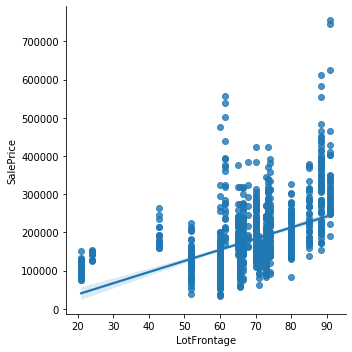

In [51]:
sns.lmplot("LotFrontage", "SalePrice", data = subset_2)

In [52]:
log_front = np.log(subset_2.LotFrontage)

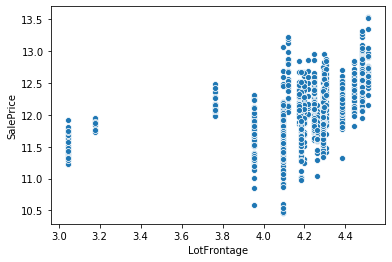

In [53]:
sns.scatterplot(log_front, log_price)

**Lot Area**

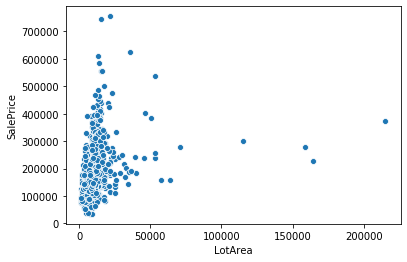

In [54]:
sns.scatterplot("LotArea", "SalePrice", data = subset)

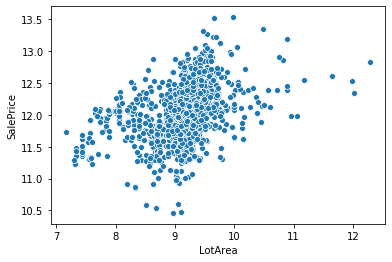

In [55]:
log_area = subset.LotArea.transform(np.log)

sns.scatterplot(log_area, log_price)

In [56]:
log_df = pd.merge(log_price, log_front, left_index = True, right_index=True)
log_df["log_area"] = log_area
log_df["MasVnrArea"] = subset.MasVnrArea

log_df.head()

,SalePrice,LotFrontage,log_area,MasVnrArea
0,12.247694,4.248495,9.041922,196.0
1,12.109011,4.219508,9.169518,0.0
2,12.317167,4.248495,9.328123,162.0
3,11.849398,4.304065,9.164296,0.0
4,12.429216,4.510860,9.565214,350.0


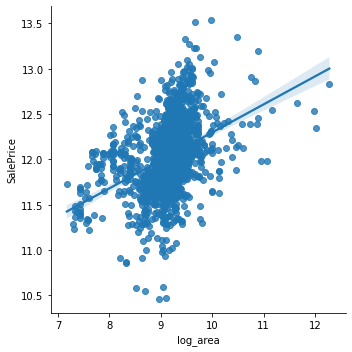

In [57]:
sns.lmplot("log_area", "SalePrice", log_df)

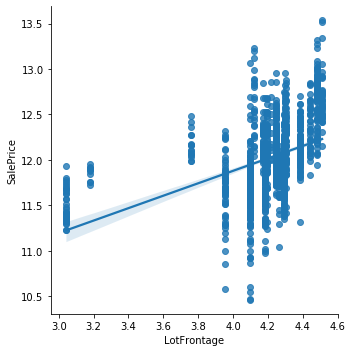

In [58]:
sns.lmplot("LotFrontage", "SalePrice", log_df)

In [59]:
def boxplot_(column, fig_num):
    
    x = subset[column]
    
    y = subset.SalePrice
    
    plt.figure(fig_num, figsize=(12, 7))
    
    sns.boxplot(x, y, data = subset)
    
    print("Value Counts: \n")
    print(x.value_counts())
    print("-" *50)


**Street**

Value Counts: 

Pave    1454
Grvl       6
Name: Street, dtype: int64
--------------------------------------------------


<function matplotlib.pyplot.show(*args, **kw)>

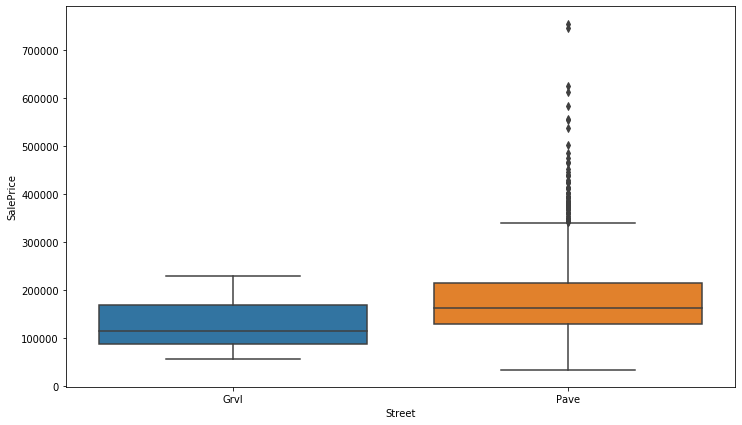

In [60]:
boxplot_("Street", 1)
plt.show

**Alley**

Consider Binary

Value Counts: 

None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64
--------------------------------------------------


<function matplotlib.pyplot.show(*args, **kw)>

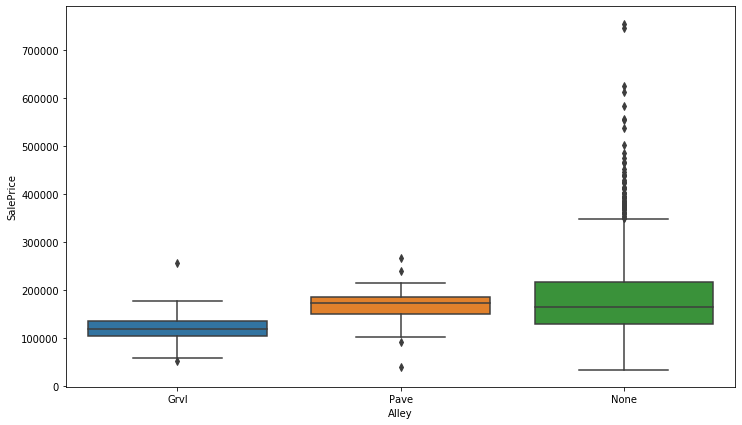

In [61]:
boxplot_("Alley", 2)
plt.show


**Lot Shape**

 Binary or Dummify

Value Counts: 

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
--------------------------------------------------


<function matplotlib.pyplot.show(*args, **kw)>

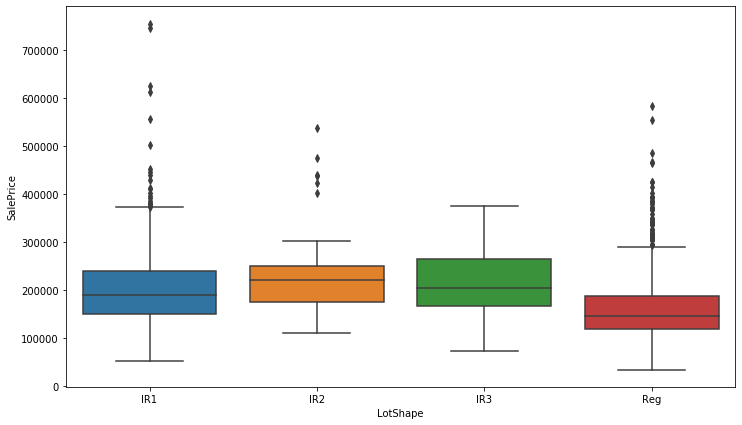

In [62]:
boxplot_("LotShape", 3)
plt.show

**Land Contour**

 Binary or Dummify

Value Counts: 

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
--------------------------------------------------


<function matplotlib.pyplot.show(*args, **kw)>

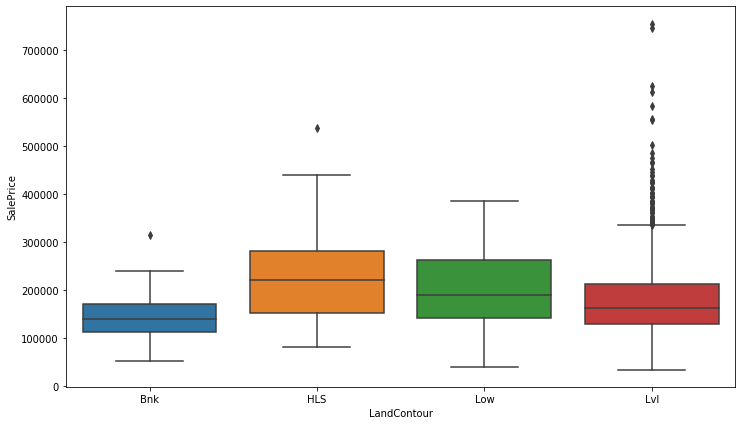

In [63]:
boxplot_("LandContour", 4)
plt.show

**Utilities**

Drop

Value Counts: 

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
--------------------------------------------------


<function matplotlib.pyplot.show(*args, **kw)>

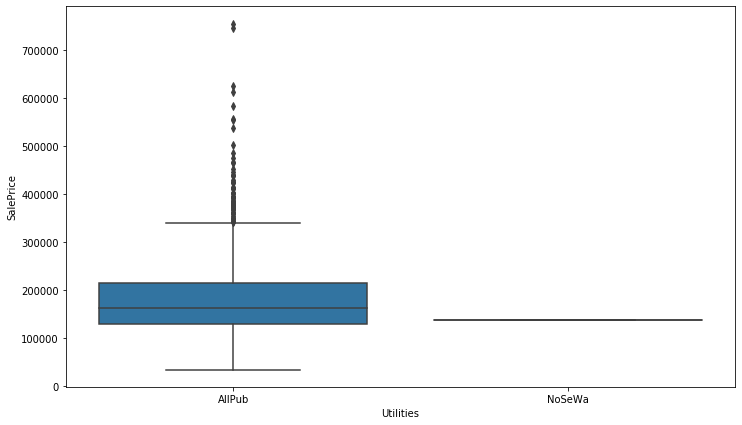

In [64]:
boxplot_("Utilities", 5)
plt.show

**LotConfig**

- Inside Inside lot
- Corner Corner lot
- CulDSac  Cul-de-sac
- FR2  Frontage on 2 sides of property
- FR3  Frontage on 3 sides of property

Value Counts: 

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
--------------------------------------------------


<function matplotlib.pyplot.show(*args, **kw)>

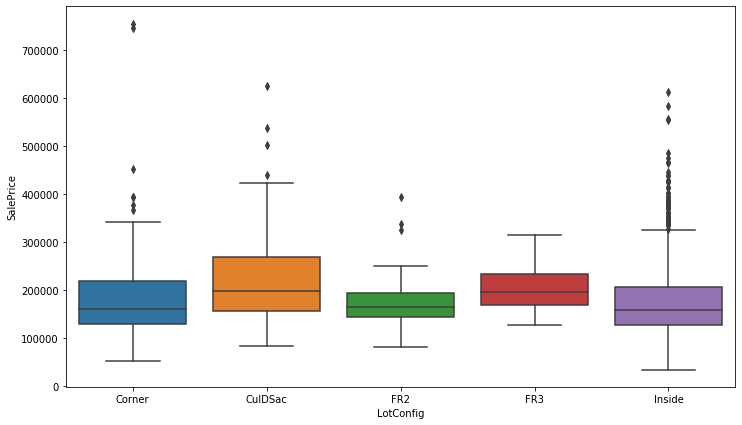

In [65]:
boxplot_("LotConfig", 6)
plt.show

**LandSlope**

Value Counts: 

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
--------------------------------------------------


<function matplotlib.pyplot.show(*args, **kw)>

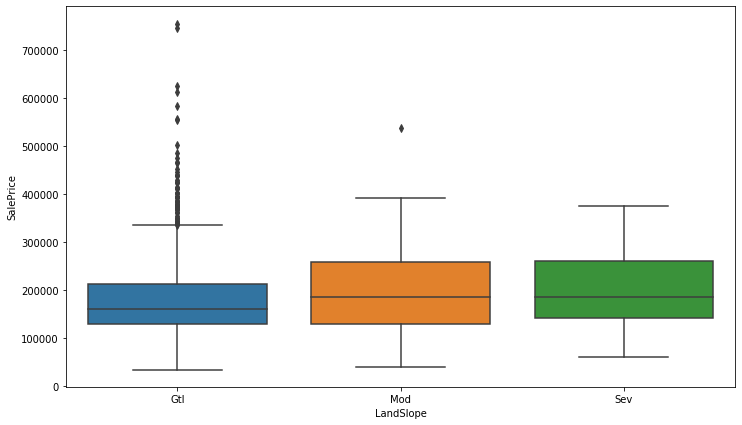

In [66]:
boxplot_("LandSlope", 7)
plt.show

Value Counts: 

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
--------------------------------------------------


<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1008x576 with 0 Axes>

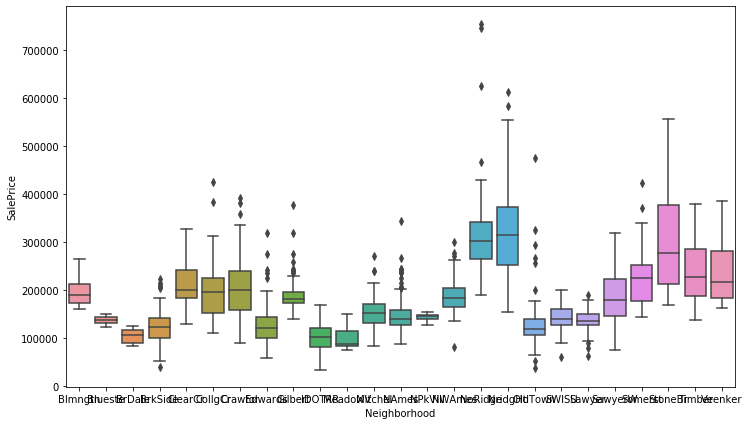

In [67]:
plt.figure(figsize=(14,8))
boxplot_("Neighborhood", 9)
plt.show

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

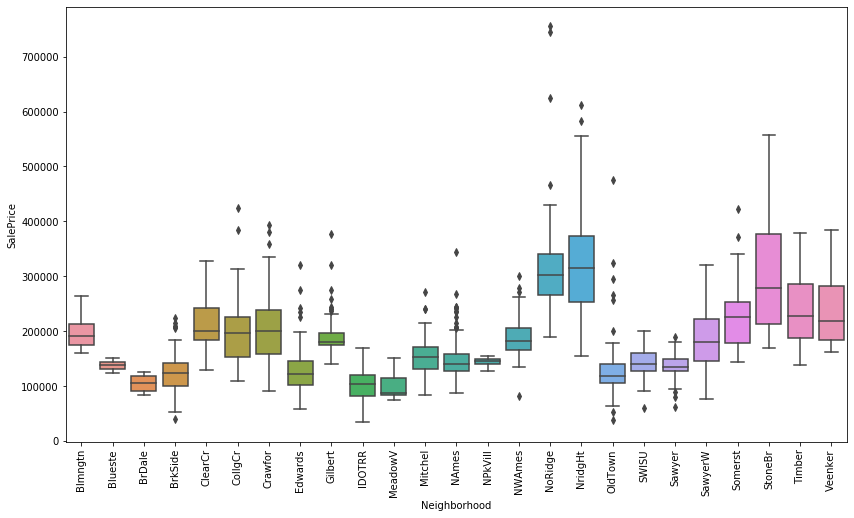

In [68]:
plt.figure(figsize=(14,8))
sns.boxplot(x = "Neighborhood", y = "SalePrice", data = subset)
plt.xticks(rotation=90)

**Condition1 & Condition2**

- Artery Adjacent to arterial street
- Feedr  Adjacent to feeder street 
- Norm Normal  
- RRNn Within 200' of North-South Railroad
- RRAn Adjacent to North-South Railroad
- PosN Near positive off-site feature--park, greenbelt, etc.
- PosA Adjacent to postive off-site feature
- RRNe Within 200' of East-West Railroad
- RRAe Adjacent to East-West Railroad

Value Counts: 

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64
--------------------------------------------------


<function matplotlib.pyplot.show(*args, **kw)>

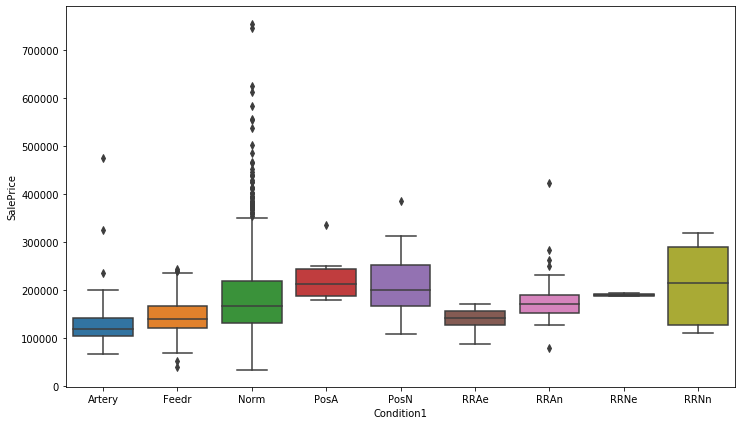

In [69]:
boxplot_("Condition1", 10)
plt.show

Value Counts: 

Norm      1445
Feedr        6
RRNn         2
PosN         2
Artery       2
RRAn         1
RRAe         1
PosA         1
Name: Condition2, dtype: int64
--------------------------------------------------


<function matplotlib.pyplot.show(*args, **kw)>

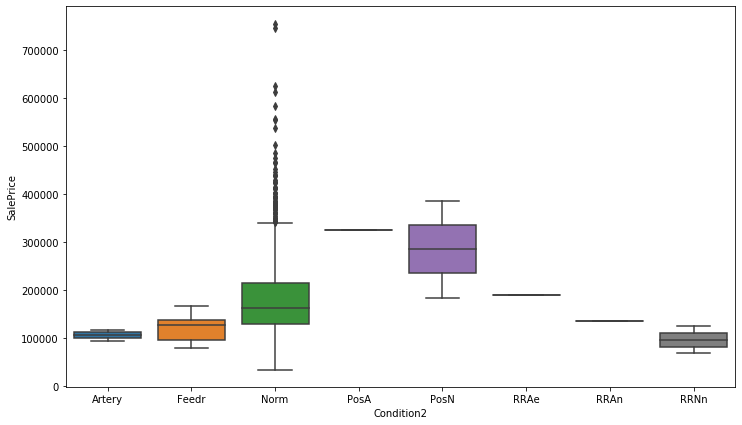

In [70]:
boxplot_("Condition2", 11)
plt.show

**BldgType**

- 1Fam Single-family Detached  
- 2FmCon Two-family Conversion; originally built as one-family dwelling
- Duplx  Duplex
- TwnhsE Townhouse End Unit
- TwnhsI Townhouse Inside Unit

Value Counts: 

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64
--------------------------------------------------


<function matplotlib.pyplot.show(*args, **kw)>

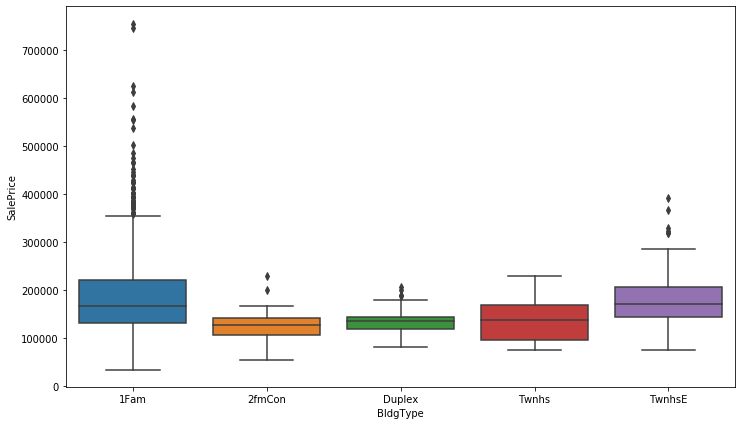

In [71]:
boxplot_("BldgType", 12)
plt.show

**HouseStyle**

- 1Story One story
- 1.5Fin One and one-half story: 2nd level finished
- 1.5Unf One and one-half story: 2nd level unfinished
- 2Story Two story
- 2.5Fin Two and one-half story: 2nd level finished
- 2.5Unf Two and one-half story: 2nd level unfinished
- SFoyer Split Foyer
- SLvl Split Level

Value Counts: 

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64
--------------------------------------------------


<function matplotlib.pyplot.show(*args, **kw)>

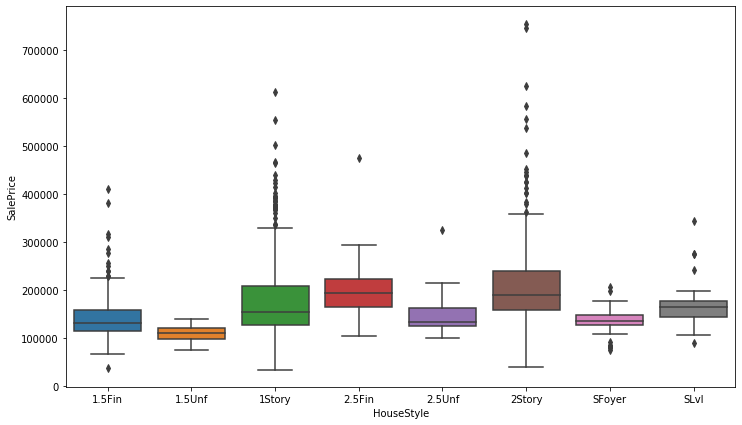

In [72]:
boxplot_("HouseStyle", 13 )
plt.show

**OverallQual**

Value Counts: 

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64
--------------------------------------------------


<function matplotlib.pyplot.show(*args, **kw)>

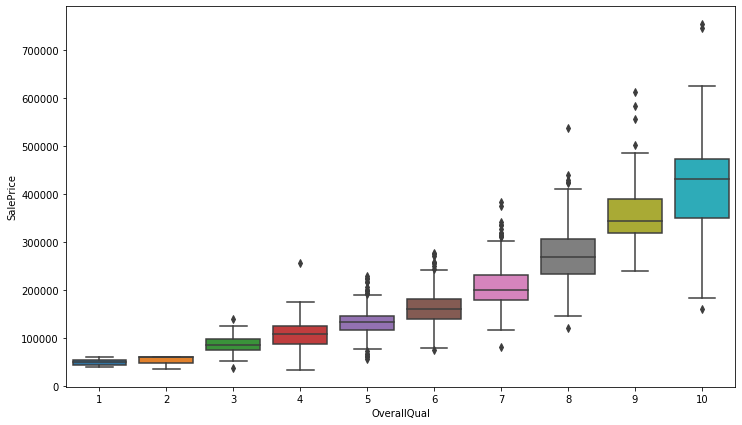

In [73]:
boxplot_("OverallQual", 14)
plt.show

**OverallCond**

Value Counts: 

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64
--------------------------------------------------


<function matplotlib.pyplot.show(*args, **kw)>

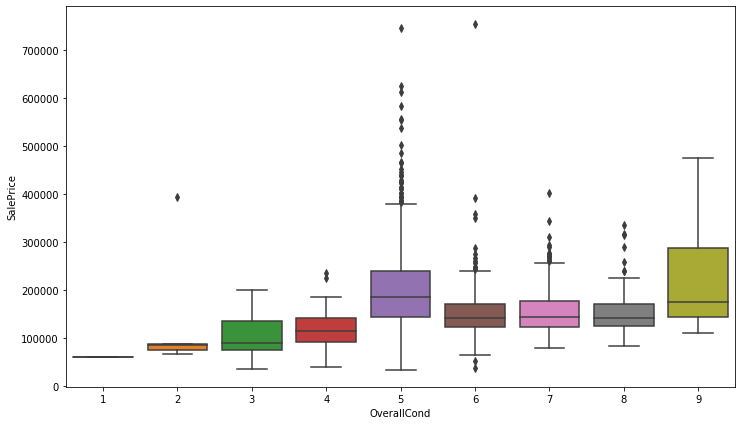

In [74]:
boxplot_("OverallCond", 15)
plt.show

**YearBuilt**

In [75]:
subset.YearBuilt.value_counts()

2006    67
2005    64
2004    54
2007    49
2003    45
1976    33
1977    32
1920    30
1959    26
1999    25
1998    25
1958    24
1965    24
1970    24
1954    24
2000    24
2002    23
2008    23
1972    23
1968    22
1971    22
1950    20
2001    20
1957    20
1962    19
1994    19
1966    18
2009    18
1995    18
1940    18
1910    17
1960    17
1993    17
1978    16
1955    16
1925    16
1963    16
1967    16
1996    15
1941    15
1964    15
1969    14
1956    14
1961    14
1997    14
1948    14
1992    13
1990    12
1953    12
1949    12
1988    11
1973    11
1915    10
1900    10
1980    10
1974    10
1979     9
1926     9
1930     9
1936     9
1984     9
1939     8
1922     8
1975     8
1916     8
1924     7
1928     7
1918     7
1914     7
1923     7
1946     7
1935     6
1945     6
1931     6
1982     6
1921     6
1951     6
1985     5
1937     5
1947     5
1991     5
1981     5
1986     5
1952     5
1880     4
1929     4
1932     4
1938     4
1983     4
1927     3
1919     3

**YearRemodAdd**

In [76]:
subset.YearRemodAdd.value_counts()

1950    178
2006     97
2007     76
2005     73
2004     62
2000     55
2003     51
2002     48
2008     40
1996     36
1998     36
1995     31
1976     30
1999     30
1970     26
1997     25
1977     25
2009     23
1994     22
2001     21
1972     20
1965     19
1993     19
1971     18
1959     18
1968     17
1992     17
1978     16
1966     15
1958     15
1990     15
1962     14
1954     14
1969     14
1991     14
1963     13
1960     12
1967     12
1980     12
1973     11
1964     11
1989     11
1987     10
1975     10
1979     10
1956     10
1953     10
1957      9
1988      9
1955      9
1985      9
1961      8
1981      8
1974      7
1982      7
1984      7
2010      6
1983      5
1952      5
1986      5
1951      4
Name: YearRemodAdd, dtype: int64

**RoofStyle**

- Flat Flat
- Gable  Gable
- Gambrel  Gabrel (Barn)
- Hip  Hip
- Mansard  Mansard
- Shed Shed

Value Counts: 

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64
--------------------------------------------------


<function matplotlib.pyplot.show(*args, **kw)>

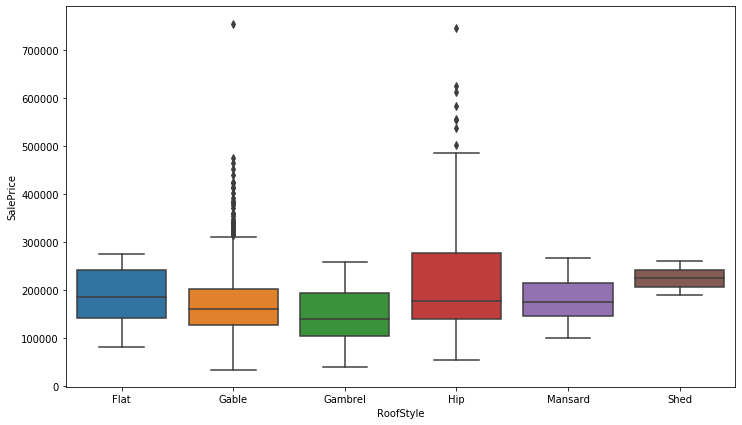

In [77]:
boxplot_("RoofStyle", 16)
plt.show

 **RoofMatl**
 
- ClyTile  Clay or Tile
- CompShg  Standard (Composite) Shingle
- Membran  Membrane
- Metal  Metal
- Roll Roll
- Tar&Grv  Gravel & Tar
- WdShake  Wood Shakes
- WdShngl  Wood Shingles

Value Counts: 

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Roll          1
Metal         1
Membran       1
ClyTile       1
Name: RoofMatl, dtype: int64
--------------------------------------------------


<function matplotlib.pyplot.show(*args, **kw)>

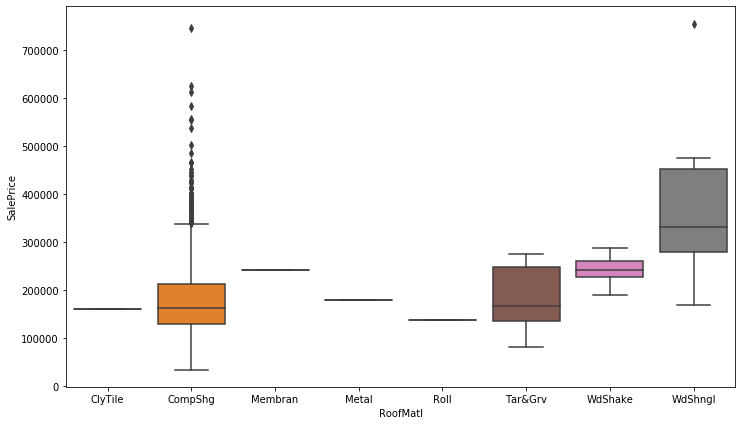

In [78]:
boxplot_("RoofMatl", 17)
plt.show

**Exteriors**

- Exterior covering on house
   - AsbShng  Asbestos Shingles
   - AsphShn  Asphalt Shingles
   - BrkComm  Brick Common
   - BrkFace  Brick Face
   - CBlock Cinder Block
   - CemntBd  Cement Board
   - HdBoard  Hard Board
   - ImStucc  Imitation Stucco
   - MetalSd  Metal Siding
   - Other  Other
   - Plywood  Plywood
   - PreCast  PreCast 
   - Stone  Stone
   - Stucco Stucco
   - VinylSd  Vinyl Siding
   - Wd Sdng  Wood Siding
   - WdShing  Wood Shingles

Value Counts: 

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
ImStucc      1
CBlock       1
AsphShn      1
Name: Exterior1st, dtype: int64
--------------------------------------------------


<function matplotlib.pyplot.show(*args, **kw)>

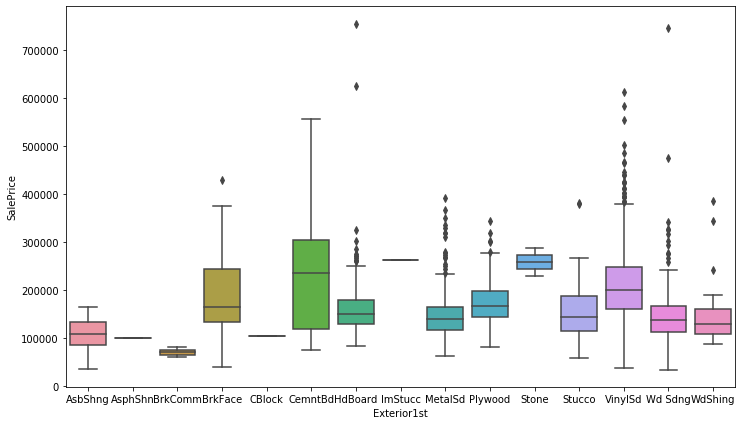

In [79]:
boxplot_("Exterior1st", 18)
plt.show

- If more than one exterior material

In [80]:
subset.Exterior2nd.value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

Value Counts: 

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64
--------------------------------------------------


<function matplotlib.pyplot.show(*args, **kw)>

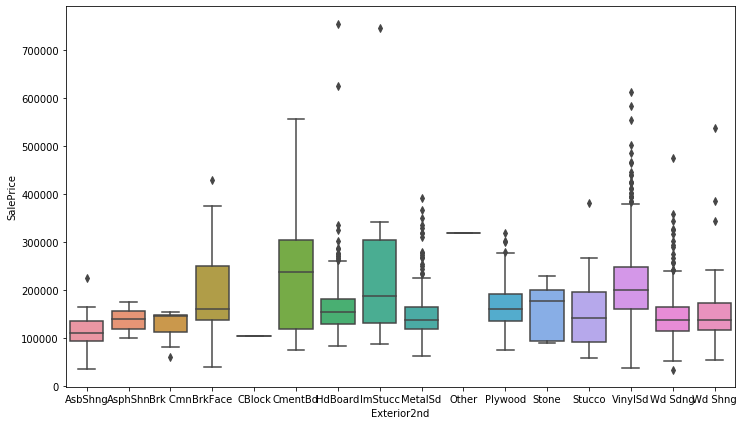

In [81]:
boxplot_("Exterior2nd", 19)
plt.show

**Masonry**

Consider making binary

**MasVnrType**: 

Masonry veneer type
- BrkCmn Brick Common
- BrkFace  Brick Face
- CBlock Cinder Block
- None None
- Stone  Stone

Value Counts: 

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
--------------------------------------------------


<function matplotlib.pyplot.show(*args, **kw)>

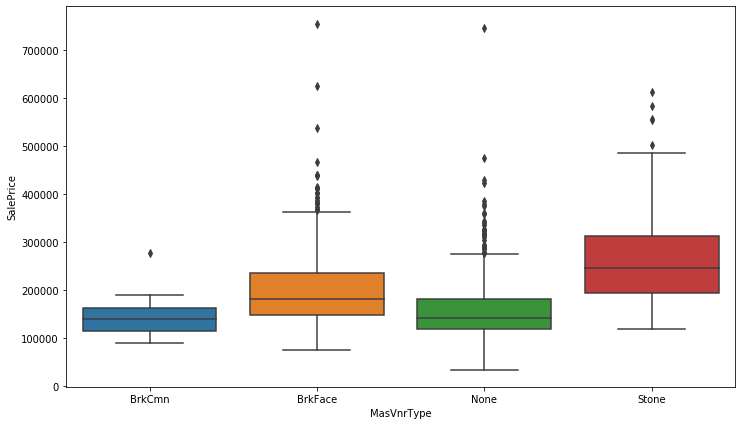

In [82]:
boxplot_("MasVnrType", 20)
plt.show

**MasVnrArea**: 

Masonry veneer area in square feet
- Consider making this binary

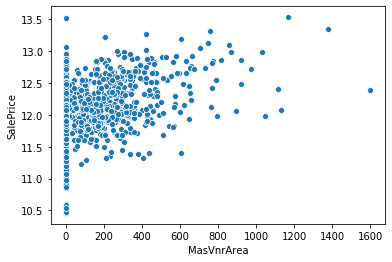

In [83]:
sns.scatterplot(subset.MasVnrArea, log_price)

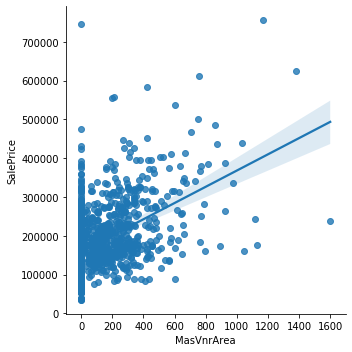

In [84]:
sns.lmplot(x = "MasVnrArea", y = "SalePrice", data = subset )

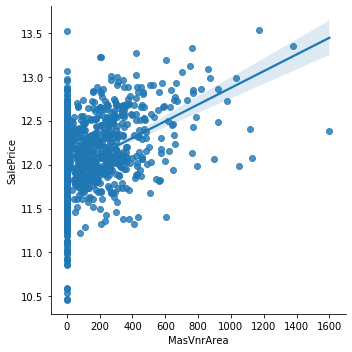

In [85]:
#log version
sns.lmplot("MasVnrArea", "SalePrice", log_df)

In [86]:
subset.MasVnrArea.value_counts()

0.0       861
72.0        8
180.0       8
108.0       8
120.0       7
16.0        7
80.0        6
200.0       6
106.0       6
340.0       6
170.0       5
132.0       5
360.0       5
84.0        5
320.0       5
100.0       4
196.0       4
246.0       4
216.0       4
160.0       4
183.0       4
178.0       4
270.0       4
300.0       4
210.0       4
268.0       4
252.0       4
168.0       4
336.0       4
220.0       4
76.0        4
288.0       4
456.0       4
40.0        4
50.0        3
130.0       3
82.0        3
208.0       3
90.0        3
70.0        3
44.0        3
420.0       3
99.0        3
110.0       3
104.0       3
85.0        3
272.0       3
226.0       3
174.0       3
240.0       3
186.0       3
169.0       3
148.0       3
350.0       3
128.0       3
176.0       3
166.0       3
116.0       3
136.0       3
312.0       3
256.0       3
145.0       3
74.0        3
42.0        3
98.0        2
66.0        2
660.0       2
243.0       2
338.0       2
143.0       2
318.0       2
285.0 